In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats
%matplotlib inline
data = pd.read_csv('/content/Admission_Predict.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
data.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [ ]:
data=data.rename(columns = {'Chance of Admit ':'Chance of Admit'})
data=data.rename(columns = {'LOR ':'LOR'})

<ipython-input-5-64e93544a305>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GRE Score'])


<Axes: xlabel='GRE Score', ylabel='Density'>

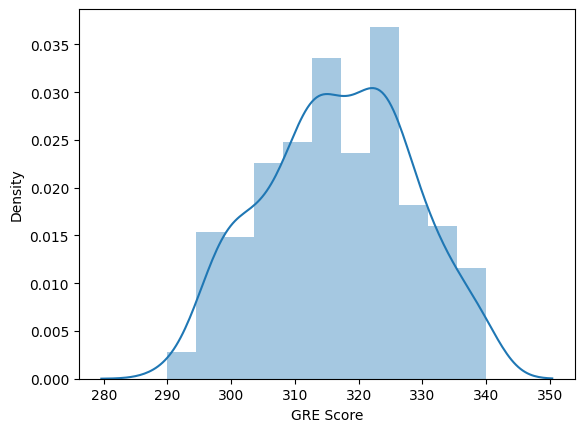

In [ ]:
sns.distplot(data['GRE Score'])

<Axes: >

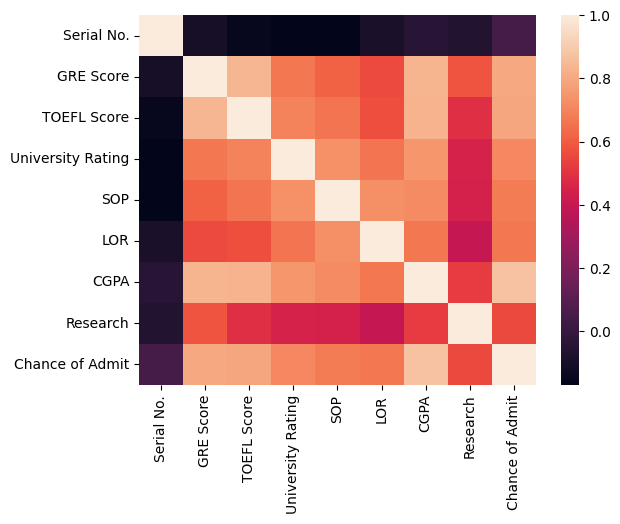

In [ ]:
sns.heatmap(data.corr())

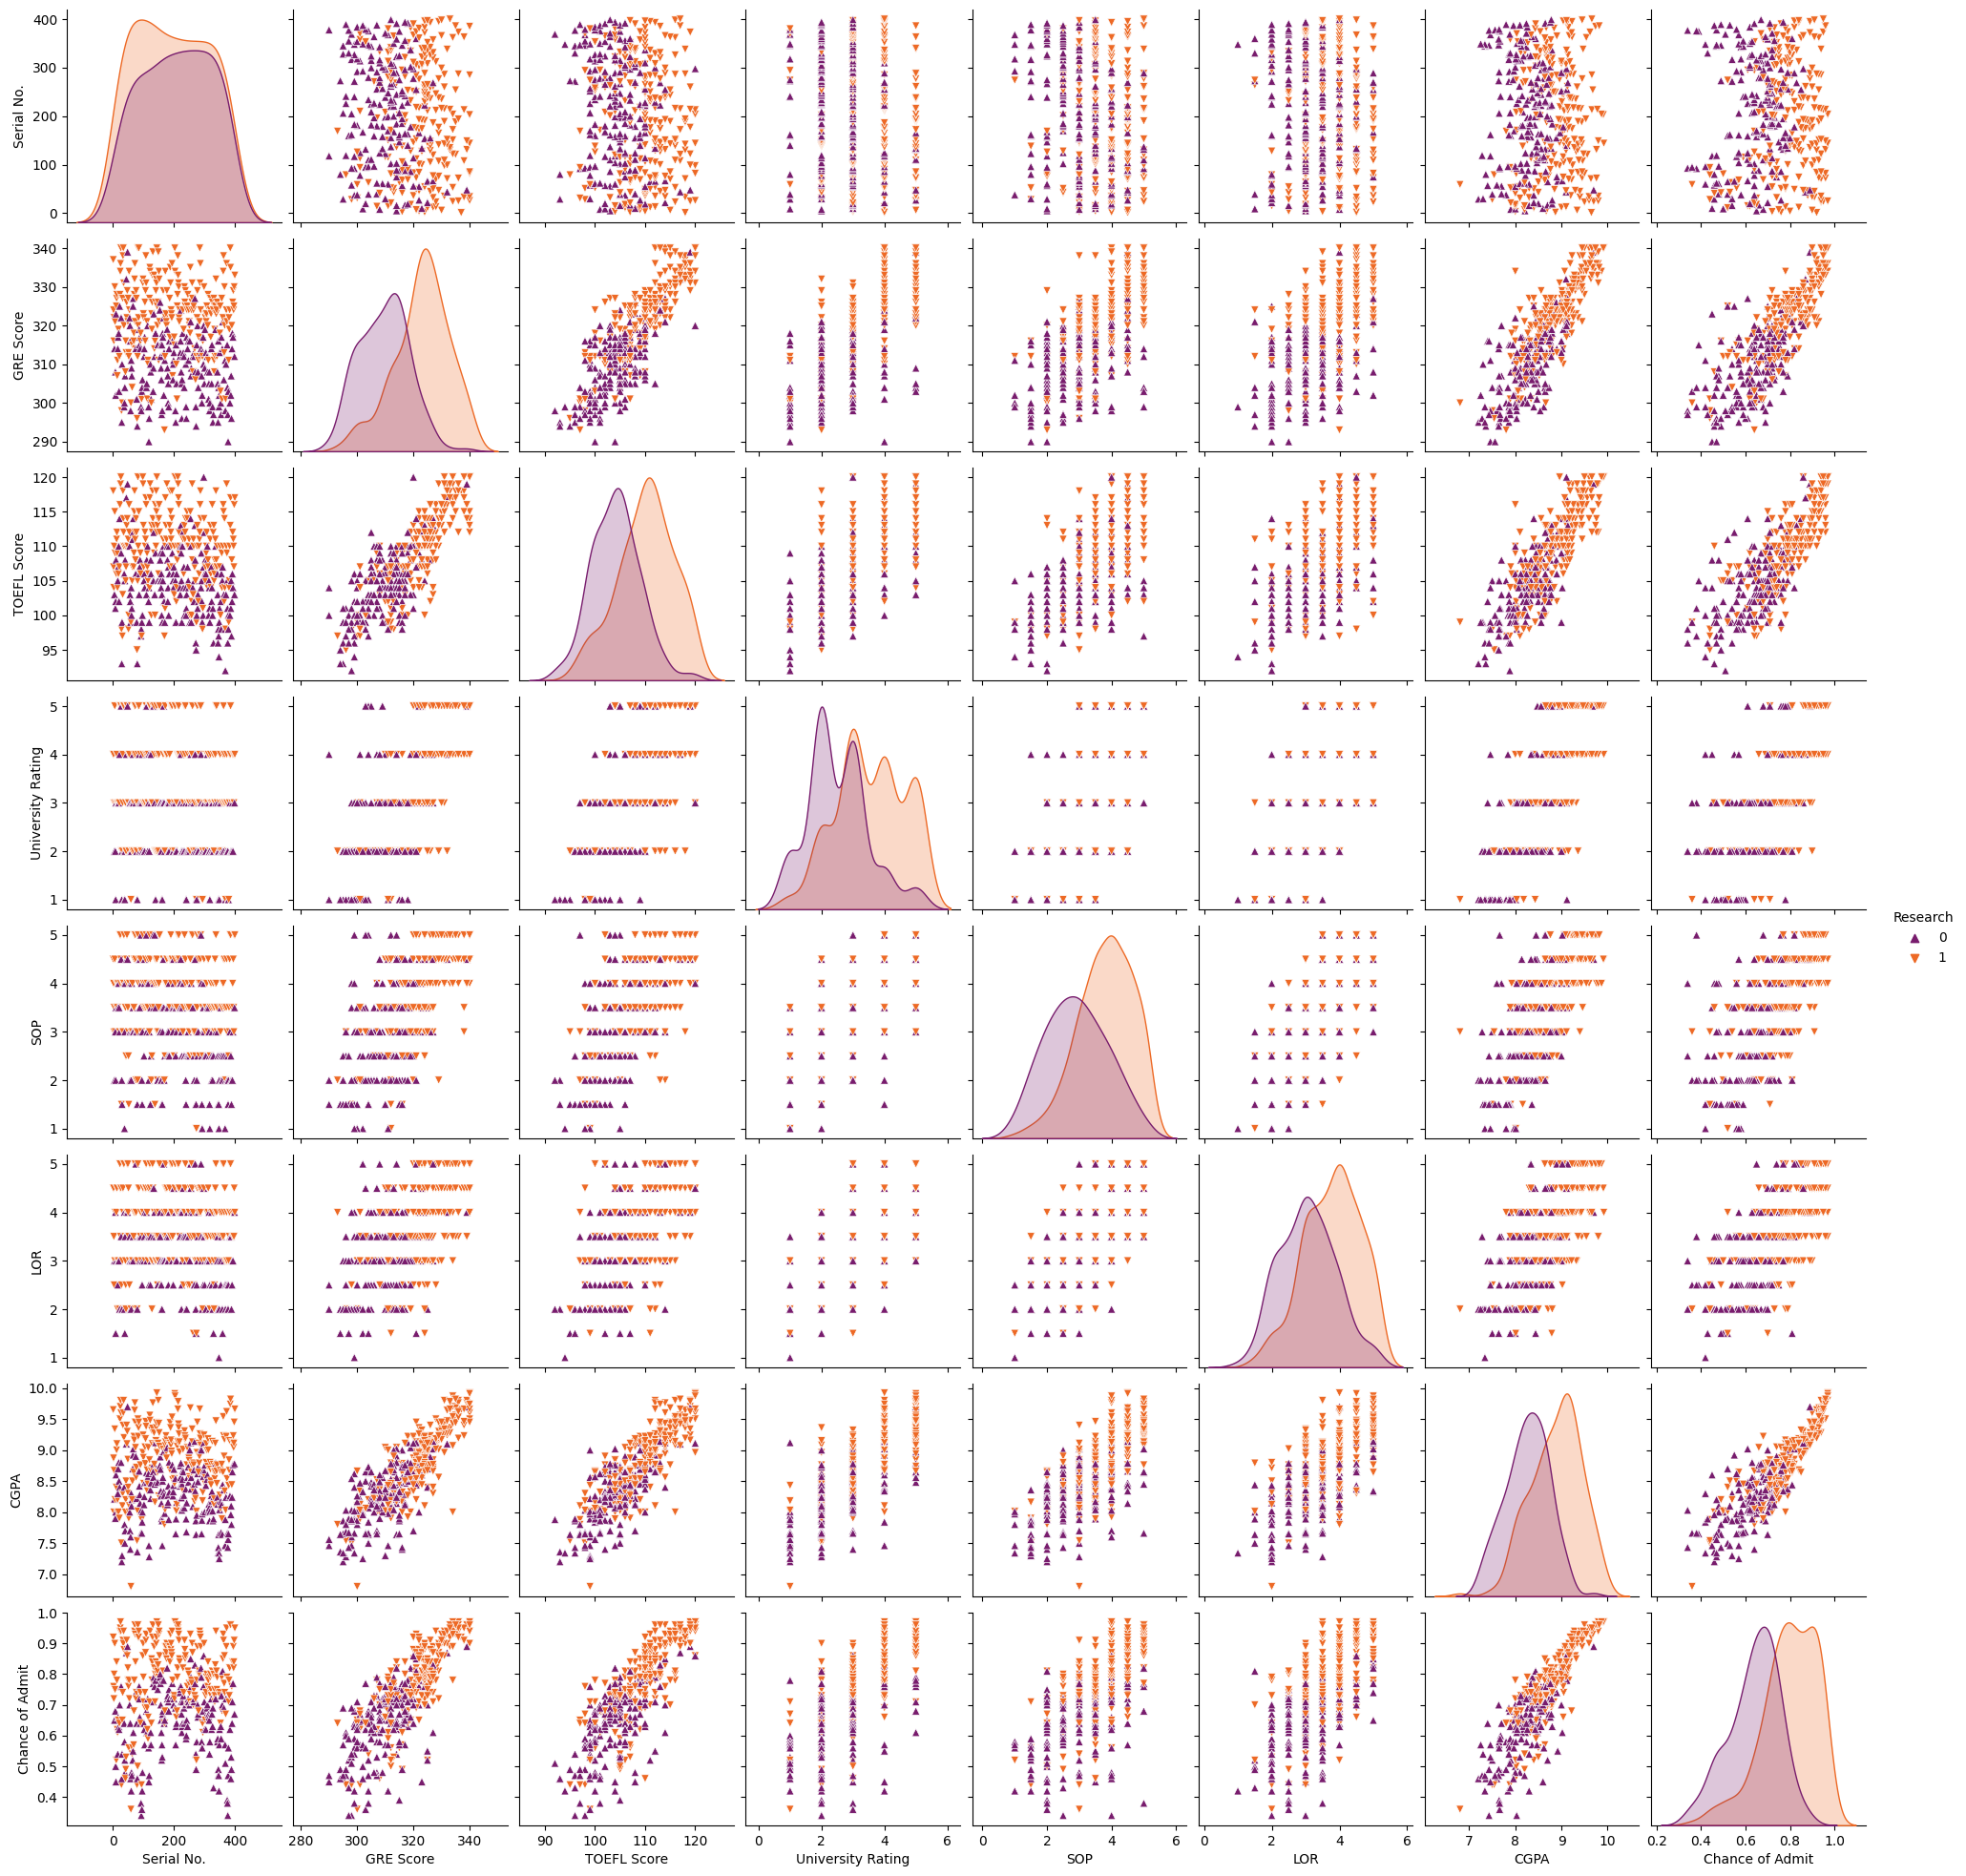

In [ ]:
sns.pairplot(data=data,hue='Research',markers=["^","v"],palette='inferno')

<Axes: xlabel='University Rating', ylabel='CGPA'>

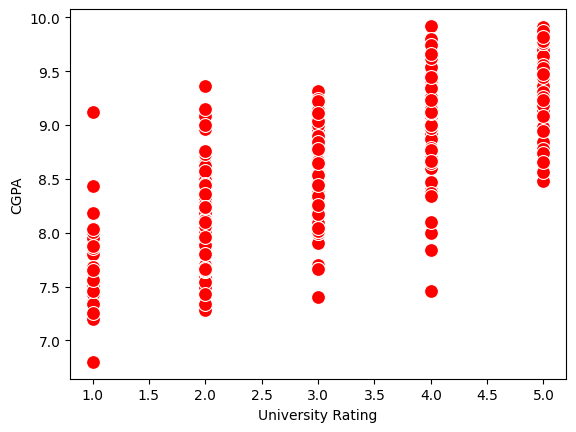

In [ ]:
sns.scatterplot(x='University Rating',y='CGPA',data=data,color='Red', s=100)

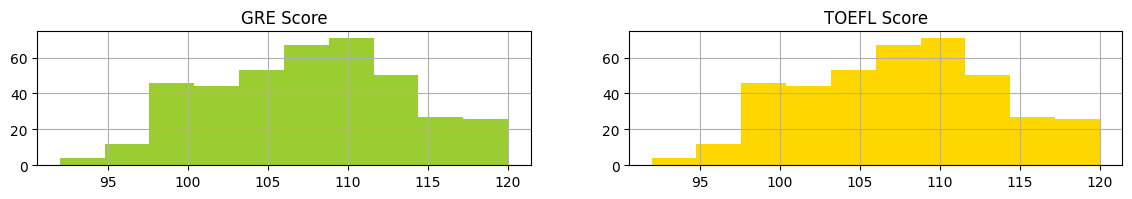

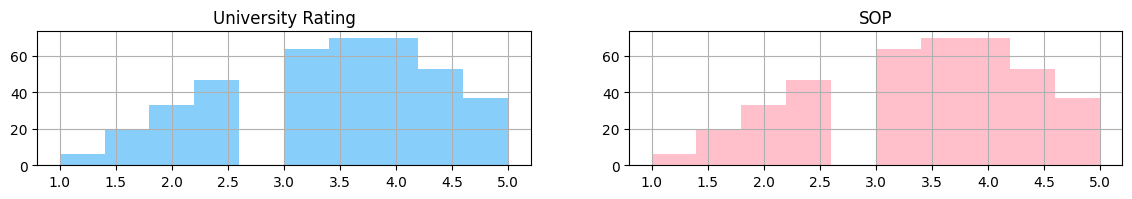

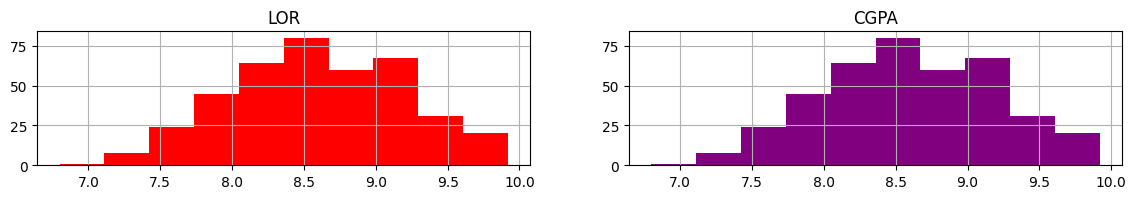

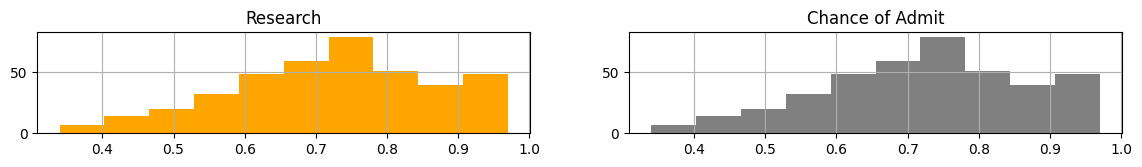

In [ ]:
category = ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research','Chance of Admit']
color = ['Yellowgreen','gold','lightskyblue','pink','red','purple','orange','gray']
start = True
for i in np.arange(4):
  fig = plt.figure(figsize=(14,8))
  plt.subplot2grid((4,2),(i,0))
  data[category[2*i+1]].hist(color=color[2*i],bins=10)
  plt.title(category[2*i])
  plt.subplot2grid((4,2),(i,1))
  data[category[2*i+1]].hist(color=color[2*i+1],bins=10)
  plt.title(category[2*i+1])
plt.subplots_adjust(hspace = 0.7, wspace = 0.2)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x=data.iloc[:,0:7].values

In [ ]:
y=data.iloc[:,7:].values
print(y)

[[1.   0.92]
 [1.   0.76]
 [1.   0.72]
 [1.   0.8 ]
 [0.   0.65]
 [1.   0.9 ]
 [1.   0.75]
 [0.   0.68]
 [0.   0.5 ]
 [0.   0.45]
 [1.   0.52]
 [1.   0.84]
 [1.   0.78]
 [1.   0.62]
 [1.   0.61]
 [0.   0.54]
 [0.   0.66]
 [1.   0.65]
 [0.   0.63]
 [0.   0.62]
 [1.   0.64]
 [0.   0.7 ]
 [1.   0.94]
 [1.   0.95]
 [1.   0.97]
 [1.   0.94]
 [0.   0.76]
 [1.   0.44]
 [0.   0.46]
 [0.   0.54]
 [1.   0.65]
 [1.   0.74]
 [1.   0.91]
 [1.   0.9 ]
 [1.   0.94]
 [1.   0.88]
 [0.   0.64]
 [0.   0.58]
 [0.   0.52]
 [0.   0.48]
 [1.   0.46]
 [1.   0.49]
 [1.   0.53]
 [0.   0.87]
 [1.   0.91]
 [1.   0.88]
 [1.   0.86]
 [0.   0.89]
 [1.   0.82]
 [1.   0.78]
 [1.   0.76]
 [1.   0.56]
 [1.   0.78]
 [1.   0.72]
 [0.   0.7 ]
 [0.   0.64]
 [0.   0.64]
 [0.   0.46]
 [1.   0.36]
 [0.   0.42]
 [0.   0.48]
 [0.   0.47]
 [1.   0.54]
 [1.   0.56]
 [0.   0.52]
 [0.   0.55]
 [0.   0.61]
 [1.   0.57]
 [1.   0.68]
 [1.   0.78]
 [1.   0.94]
 [1.   0.96]
 [1.   0.93]
 [1.   0.84]
 [0.   0.74]
 [1.   0.72]
 [1.   0.74]

In [ ]:
x=sc.fit_transform(x)
print(x)

[[0.         0.94       0.92857143 ... 0.875      0.875      0.91346154]
 [0.00250627 0.68       0.53571429 ... 0.75       0.875      0.66346154]
 [0.00501253 0.52       0.42857143 ... 0.5        0.625      0.38461538]
 ...
 [0.99498747 0.8        0.85714286 ... 1.         0.875      0.84935897]
 [0.99749373 0.44       0.39285714 ... 0.625      0.75       0.63461538]
 [1.         0.86       0.89285714 ... 1.         0.75       0.91666667]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=101)
y_train=(y_train>0.5)
print(y_train)
y_test=(y_test>0.5)
print(y_test)

[[ True  True]
 [False  True]
 [ True  True]
 [ True  True]
 [ True False]
 [ True  True]
 [ True  True]
 [ True  True]
 [False  True]
 [ True  True]
 [ True  True]
 [False  True]
 [ True  True]
 [ True  True]
 [False  True]
 [False False]
 [ True False]
 [False  True]
 [ True  True]
 [False  True]
 [False False]
 [False  True]
 [False  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [False  True]
 [False  True]
 [ True  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [ True  True]
 [ True  True]
 [False  True]
 [ True  True]
 [False  True]
 [False  True]
 [ True  True]
 [ True  True]
 [False  True]
 [ True  True]
 [ True  True]
 [False  True]
 [ True  True]
 [ True  True]
 [False  True]
 [ True  True]
 [ True  True]
 [False  True]
 [ True  True]
 [False  True]
 [ True  True]
 [False False]
 [False  True]
 [ True  True]
 [False  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [False  True]
 [False  True]
 [False  True]
 [ True  T

In [ ]:
from sklearn.linear_model import LogisticRegression
cls =LogisticRegression(random_state =0)
lr=cls.fit(x_train, y_train.argmax(axis=1))
y_pred =lr.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#libraries to train neural networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
#initialize the model
model=keras.Sequential()
#Add input layer
model.add(Dense(7,activation ='relu',input_dim=7))
#Add hidden layer
model.add(Dense(7,activation='relu'))
#Add output layer
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model: "sequential"

In [ ]:
model.compile(loss ='binary_crossentropy', optimizer = 'adam',
metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 20, epochs = 100)

Epoch 1/100
14/14 [==============================] - 2s 4ms/step - loss: 4.8688 - accuracy: 0.2411
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 2.6495 - accuracy: 0.2411
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 1.5269 - accuracy: 0.2411
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 1.2550 - accuracy: 0.2411
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 1.0608 - accuracy: 0.2625
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.8752 - accuracy: 0.2911
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.8248 - accuracy: 0.3339
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7898 - accuracy: 0.3804
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.7629 - accuracy: 0.4268
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7367 - accuracy: 0.4982
Epoch 11/

In [ ]:
from sklearn.metrics import accuracy_score
#make predictions on the training data
train_predictions = model.predict(x_train)
print(train_predictions)

9/9 [==============================] - 0s 3ms/step
[[0.97957486]
 [0.97625417]
 [0.7461612 ]
 [0.91100925]
 [0.59748834]
 [0.80043024]
 [1.0052499 ]
 [0.8724538 ]
 [0.74945575]
 [0.7959505 ]
 [0.9801957 ]
 [0.7956752 ]
 [1.041937  ]
 [0.7650639 ]
 [0.7194241 ]
 [0.19744772]
 [0.46010217]
 [0.5307102 ]
 [0.76528466]
 [0.6580886 ]
 [0.5841231 ]
 [0.89864355]
 [0.6267092 ]
 [0.7062288 ]
 [0.9151173 ]
 [0.88304794]
 [0.9670704 ]
 [0.8574676 ]
 [0.5256874 ]
 [0.73015666]
 [0.79835355]
 [0.45525807]
 [0.77520615]
 [0.50010943]
 [0.6529779 ]
 [0.9318621 ]
 [1.0887682 ]
 [0.68329513]
 [1.0382415 ]
 [0.34372053]
 [0.7180634 ]
 [0.6540337 ]
 [1.0573319 ]
 [0.65322906]
 [0.58767647]
 [0.7636115 ]
 [0.6211141 ]
 [0.8392916 ]
 [0.6468839 ]
 [0.7143608 ]
 [0.8932875 ]
 [0.72693706]
 [0.37652457]
 [0.82695556]
 [0.81987995]
 [0.9492601 ]
 [0.25083324]
 [0.6802557 ]
 [0.9061159 ]
 [0.6418109 ]
 [0.9394229 ]
 [1.0109066 ]
 [0.76821476]
 [0.6695751 ]
 [0.51159   ]
 [0.7862422 ]
 [0.8353811 ]
 [0.3512462

In [ ]:
#get the training accuracy
train_acc = model.evaluate(x_train, y_train, verbose=0)[1]
train_acc

0.7767857313156128

In [ ]:
#get the test accuracy
test_acc = model.evaluate(x_test, y_test, verbose=0)[1]
print(test_acc)

0.6958333253860474


In [ ]:
pred=model.predict(x_test)
pred = (pred>0.5)
pred

4/4 [==============================] - 0s 3ms/step


array([[False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [

In [ ]:
y_pred = y_pred.astype(int)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_test = y_test.astype(int)
y_test

array([[0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [0,

In [ ]:
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle
model.save('model.h5')
app = Flask(__name__)
from tensorflow.keras.models import load_model
model = load_model('model.h5')
@app.route('/')
def home():
  return render_template('Demo2.html')

In [ ]:
pickle.dump(lr, open('university.pkl','wb'))